# The question:
How do different indexes correspond to the condition measured in the ground with the GT (for the closest dates)? In particular, which threshold for each habitat and each index should be taken to better align with poor, moderate and good conditions. 

In [1]:
#Importing the required libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the CSV file
df = pd.read_excel('Iteration1_GT-2023_208points_5_Indexes.xlsx')

In [3]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          208 non-null    object        
 1   Date        208 non-null    datetime64[ns]
 2   Condition   208 non-null    object        
 3   BNG_broad   208 non-null    object        
 4   BNG_detail  208 non-null    object        
 5   NDVI        208 non-null    float64       
 6   EVI         208 non-null    float64       
 7   LAI         208 non-null    float64       
 8   NDWI        208 non-null    float64       
 9   NDBI        208 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 16.4+ KB


In [4]:
#Describe 
df.describe()

,Date,NDVI,EVI,LAI,NDWI,NDBI
count,208,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2023-07-10 14:32:18.461538560,0.709538,0.577460,1.971248,-0.645139,-0.513930
min,2023-04-04 00:00:00,-0.002281,0.019830,-0.046256,-0.821232,-0.741430
25%,2023-06-05 00:00:00,0.648247,0.446941,1.499031,-0.746761,-0.640077
50%,2023-07-05 00:00:00,0.778603,0.596497,2.040127,-0.708481,-0.544338
75%,2023-08-10 00:00:00,0.846785,0.715065,2.469106,-0.619159,-0.432698
max,2023-09-20 00:00:00,0.911047,1.661938,5.894891,-0.043758,-0.026552
std,NaN,0.198807,0.185239,0.670193,0.171501,0.158581


C:\Users\gunaw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


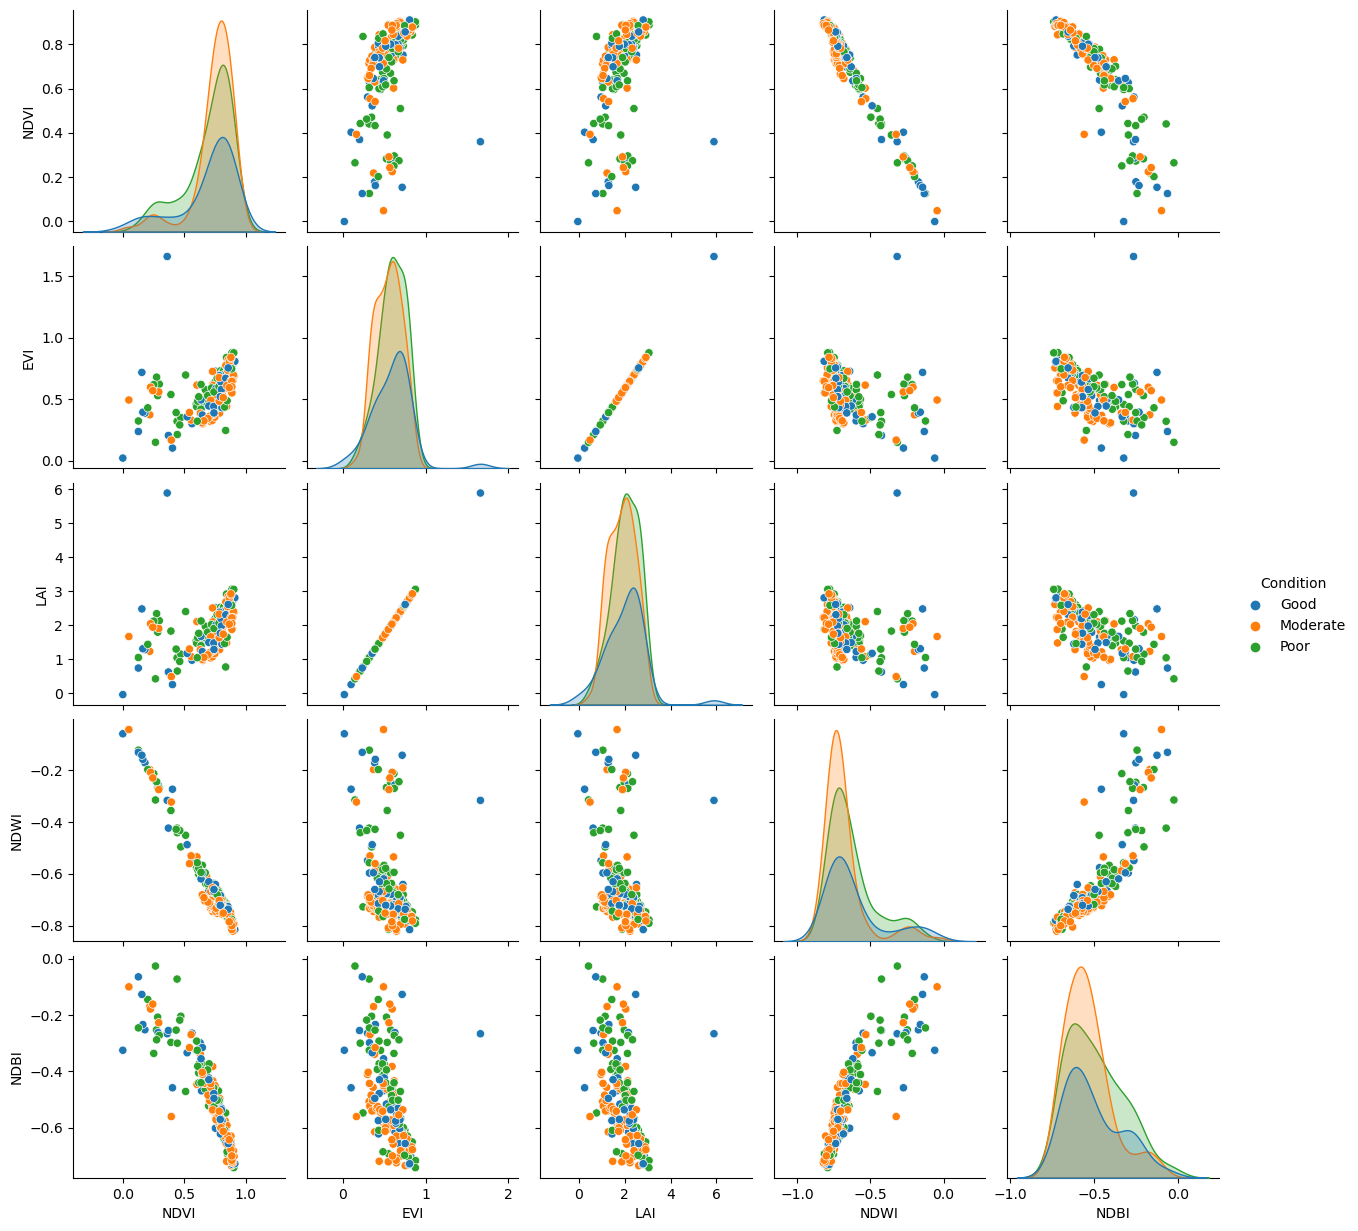

In [5]:
sns.pairplot(data=df, hue="Condition")

<Axes: xlabel='NDVI', ylabel='Count'>

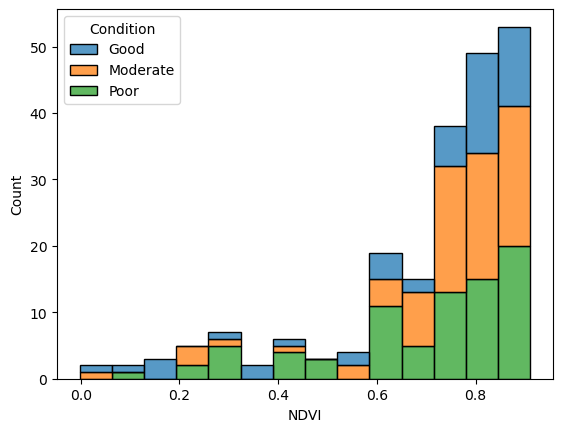

In [6]:
#Plotting the individual correlation between the indexes and the condition for a more clear understanding. 

sns.histplot(data=df, x="NDVI", hue="Condition", multiple="stack")

<Axes: xlabel='EVI', ylabel='Count'>

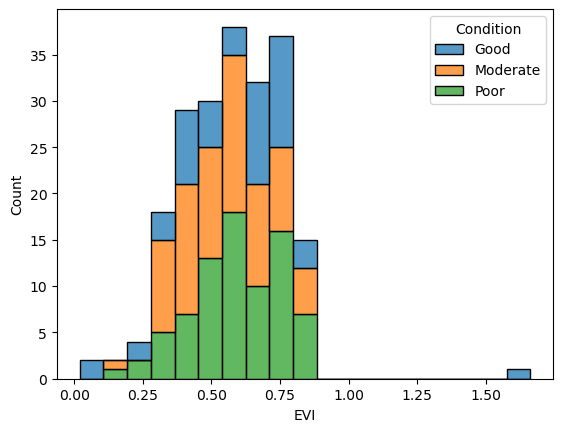

In [7]:
sns.histplot(data=df, x="EVI", hue="Condition", multiple="stack")

<Axes: xlabel='LAI', ylabel='Count'>

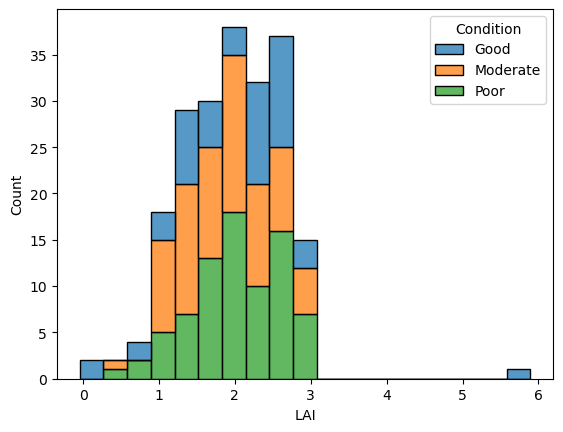

In [8]:
sns.histplot(data=df, x="LAI", hue="Condition", multiple="stack")

<Axes: xlabel='NDWI', ylabel='Count'>

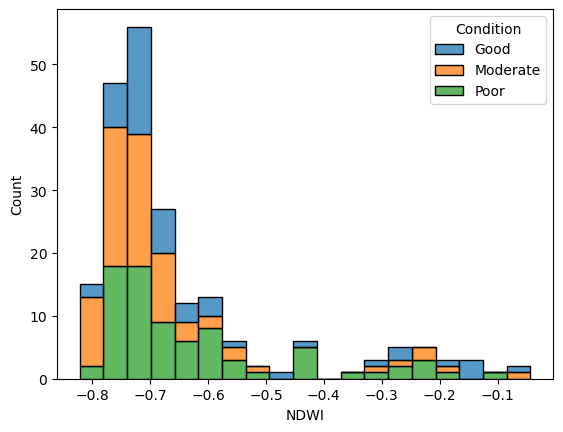

In [9]:
sns.histplot(data=df, x="NDWI", hue="Condition", multiple="stack")

<Axes: xlabel='NDBI', ylabel='Count'>

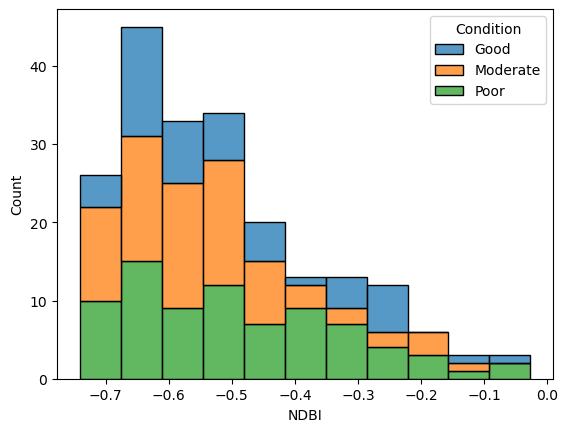

In [10]:
sns.histplot(data=df, x="NDBI", hue="Condition", multiple="stack")

In [11]:
df['BNG_detail'].unique()

array(['Reedbeds', 'Coastal Saltmarsh', 'Littoral Mud',
       'Modified Grassland', 'Other Grassland', 'Cropland',
       'Lowland Calcareous Grassland', 'Lowland Meadows',
       'Lowland Dry Acid Grassland', 'Heathland',
       'Purple Moor Grass and Rush Pastures', 'Other Scrub',
       'Other Urban', 'Open Mosaic Habitats on Previously Developed Land',
       'Cemeteries and Churchyards', 'Wetland', 'Other Lakes and Ponds',
       'Coniferous Woodland', 'Lowland Mixed Deciduous Woodland',
       'Other Deciduous Woodland', 'Wood Pasture and Parkland',
       'Traditional Orchard'], dtype=object)

In [12]:
df['BNG_broad'].unique()

array(['Coastal', 'Cropland and Grassland', 'Heathland and Scrub',
       'Urban', 'Water', 'Woodland'], dtype=object)

In [13]:
df_costal = df[df['BNG_broad']=='Coastal']
df_cropp_gross = df[df['BNG_broad']=='Cropland and Grassland']
df_health_scrub = df[df['BNG_broad']=='Heathland and Scrub']
df_urban = df[df['BNG_broad']=='Urban']
df_water = df[df['BNG_broad']=='Water']
df_woodland = df[df['BNG_broad']=='Woodland']

Running the Stepwise Regression to understand which features has the impact with the index - this is left for a later date for further evaluation. 

In [14]:
#Convert the condition into numerical values
values = {'Good':2, 'Moderate':1, 'Poor':0}

df['Condition'] = df['Condition'].map(values)

In [15]:
df.head()

,ID,Date,Condition,BNG_broad,BNG_detail,NDVI,EVI,LAI,NDWI,NDBI
0,BRC-030,2023-09-20,2,Coastal,Reedbeds,0.639164,0.488464,1.649263,-0.576521,-0.468935
1,BRC-031,2023-09-20,2,Coastal,Reedbeds,0.359445,1.661938,5.894891,-0.316932,-0.266587
2,BRC-033,2023-09-20,1,Coastal,Reedbeds,0.217443,0.372391,1.229312,-0.198067,-0.170252
3,ENG-094,2023-08-10,2,Coastal,Coastal Saltmarsh,0.402478,0.101464,0.249098,-0.273880,-0.458205
4,POW-009,2023-07-05,2,Coastal,Coastal Saltmarsh,0.369253,0.204003,0.620083,-0.423934,-0.255224


In [16]:
df = df.reindex(columns=['ID', 'Date', 'BNG_broad', 'BNG_detail','NDVI','EVI','LAI','NDWI','NDBI','Condition'])

In [17]:
df.head()

,ID,Date,BNG_broad,BNG_detail,NDVI,EVI,LAI,NDWI,NDBI,Condition
0,BRC-030,2023-09-20,Coastal,Reedbeds,0.639164,0.488464,1.649263,-0.576521,-0.468935,2
1,BRC-031,2023-09-20,Coastal,Reedbeds,0.359445,1.661938,5.894891,-0.316932,-0.266587,2
2,BRC-033,2023-09-20,Coastal,Reedbeds,0.217443,0.372391,1.229312,-0.198067,-0.170252,1
3,ENG-094,2023-08-10,Coastal,Coastal Saltmarsh,0.402478,0.101464,0.249098,-0.273880,-0.458205,2
4,POW-009,2023-07-05,Coastal,Coastal Saltmarsh,0.369253,0.204003,0.620083,-0.423934,-0.255224,2


In [18]:
df_for_model = df.drop(columns=['ID','Date','BNG_detail','BNG_broad'])

In [19]:
#Label encoding the pre-processing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_for_model['BNG_broad'] = label_encoder.fit_transform(df_for_model['BNG_broad'])

KeyError: 'BNG_broad'

In [22]:
# Select the features and target
X = df_for_model.iloc[:, :-1]
y = df_for_model.iloc[:, -1]

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Perform stepwise regression
sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                               n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=3)

Descison Tree Regressor 

In [30]:
#Getting the features that the model thinks is important
feature_idx = sfs.get_feature_names_out(input_features=None)
feature_idx

array(['BNG_broad', 'EVI', 'NDWI'], dtype=object)

In [23]:
#Taking the X variable and the Y outcome 
X = df_for_model.iloc[:, :-1]
y = df_for_model.iloc[:, -1]

In [57]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [51]:
pip install graphviz


  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [78]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['NDVI','EVI','LAI','NDWI','NDBI']) 

In [79]:
print(regressor.tree_.threshold)  

[ 0.18954569 -0.12743382 -2.         -0.09169237 -2.         -0.21264677
 -2.         -2.         -0.25447436 -0.26814669  0.62434679  0.41487737
 -0.3295158   0.39768521 -2.         -2.          1.05839103 -2.
 -2.         -0.44341582  0.55602694 -2.         -2.         -2.
 -0.36409713 -0.41953714 -0.4316576   0.76373971  2.60240066  2.57806194
  0.78320196  0.5478265  -0.51908955 -0.71707788 -2.         -2.
 -0.68455899 -2.         -0.46619262 -2.         -2.          2.51048636
  0.76382914  0.75305167 -0.64553988  1.9443965  -2.         -0.66501456
 -0.48418783 -2.         -2.         -2.         -2.         -2.
 -0.66443899 -0.54323894  0.67920932 -2.         -2.         -2.
 -2.         -2.         -0.73622361 -0.75982782  2.4419874   1.95601875
 -0.70550624 -2.         -2.         -2.         -0.67945129 -2.
 -2.         -0.75712678 -2.         -0.74530086  0.85875398 -2.
 -2.          0.73364559 -2.         -2.         -0.71324819  1.10327977
 -2.          0.55042076 -0.583495

Using precision recall curve to find best decision threshold value

In [45]:
#Re-preparing the data to fit the model 
df_for_model = df.drop(columns=['ID','Date','BNG_detail','BNG_broad'])
X_NDVI = df_for_model[['NDVI']]
X_EVI = df_for_model[['EVI']]
X_LAI = df_for_model[['LAI']]
X_NDWI = df_for_model[['NDWI']]
X_NDBI = df_for_model[['NDBI']]
y = df_for_model[['Condition']]

In [78]:
#Getting the individual index arrays 
from sklearn.metrics import precision_recall_curve

def returning_threshold(X,y):
    '''This is a function in place to create the threshold per index'''
    # split into train/test sets
    trainX, testX, trainy, testy = train_test_split(X.values, y.values, test_size=0.5, random_state=2, stratify=y)
    # fit a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(trainX, trainy)
    y_scores = model.predict_proba(testX)
    y_pred_label = np.amax(y_scores, axis=1)
    y_pred_label = y_pred_label.reshape(104, 1)
    fprate, tprate, thresholds = roc_curve(testy, y_pred_label, pos_label=3)
    print(thresholds)
    
print('Threshold for NDVI')
returning_threshold(X_NDVI,y)
print('Threshold for EVI')
returning_threshold(X_EVI,y)
print('Threshold for LAI')
returning_threshold(X_LAI,y)
print('Threshold for NDWI')
returning_threshold(X_NDWI,y)
print('Threshold for NDBI')
returning_threshold(X_NDBI,y)

Threshold for NDVI
[       inf 0.51310252 0.37916109]
Threshold for EVI
[       inf 0.4481231  0.37584792]
Threshold for LAI
[       inf 0.49498263 0.37347484]
Threshold for NDWI
[       inf 0.5198423  0.38011337]
Threshold for NDBI
[       inf 0.50364619 0.37988488]


C:\Users\gunaw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gunaw\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\gunaw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gunaw\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\gunaw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConve